In [4]:
from model import *
from helpers import *

In [5]:
from matplotlib import rcParams

# Matplotlib settings
rcParams['font.family'] = 'Arial'
rcParams['axes.labelsize'] = 10
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['legend.fontsize'] = 8
rcParams['font.size'] = 8

In [6]:
# Extract end of last snowball
def get_last_snowball_end_time(results):
    t = results['t']
    snowball = results['snowball']
    starts, ends, durations, _ = get_times(t, snowball)
    if ends:
        return ends[-1]
    return np.nan

In [11]:
def sweep_grid(C_imb_array, tau_array,
               Cimb_min_guess=0.4,
               max_t_max=100,
               dt=1e4/1e6):
    Cimb_min_guess = 0.4

    n_tau = len(tau_array)
    n_c   = len(C_imb_array)
    dur_grid = np.full((n_tau, n_c), np.nan, dtype=float)

    for i, tau in enumerate(tau_array):
        for j, C_imb in enumerate(C_imb_array):
            guess_duration = -tau * np.log(Cimb_min_guess / C_imb)
            t_max = guess_duration + 10
            if guess_duration > max_t_max:
                continue

            print(f"Running tau={tau:0.1f}, C_imb={C_imb:0.1f}, est. dur={guess_duration:0.0f} Myr...", end=" ")
            results = run_model(W_LIP=C_imb, tau=tau, PC_LIP=0, t_max=t_max, dt=dt)

            duration = get_last_snowball_end_time(results)
            print(f"→ {duration:.1f} Myr")

            dur_grid[i, j] = duration

    run_count = np.isfinite(dur_grid).sum()
    total_possible = dur_grid.size
    print(f"\nCompleted sweep: tried {run_count} / {total_possible} grid points "
          f"({100 * run_count / total_possible:.1f}%)")

    return dur_grid


In [13]:
Cimb_arr = np.linspace(1, 40, 20)
tau_arr  = np.linspace(10, 80, 20)
dur_grid = sweep_grid(Cimb_arr, tau_arr)

Running tau=10.0, C_imb=1.0, est. dur=9 Myr... → 3.9 Myr
Running tau=10.0, C_imb=3.1, est. dur=20 Myr... → 10.4 Myr
Running tau=10.0, C_imb=5.1, est. dur=25 Myr... → 16.2 Myr
Running tau=10.0, C_imb=7.2, est. dur=29 Myr... → 22.4 Myr
Running tau=10.0, C_imb=9.2, est. dur=31 Myr... → 30.1 Myr
Running tau=10.0, C_imb=11.3, est. dur=33 Myr... → 26.6 Myr
Running tau=10.0, C_imb=13.3, est. dur=35 Myr... → 24.7 Myr
Running tau=10.0, C_imb=15.4, est. dur=36 Myr... → 32.0 Myr
Running tau=10.0, C_imb=17.4, est. dur=38 Myr... → 30.0 Myr
Running tau=10.0, C_imb=19.5, est. dur=39 Myr... → 28.5 Myr
Running tau=10.0, C_imb=21.5, est. dur=40 Myr... → 36.7 Myr
Running tau=10.0, C_imb=23.6, est. dur=41 Myr... → 34.9 Myr
Running tau=10.0, C_imb=25.6, est. dur=42 Myr... → 33.5 Myr
Running tau=10.0, C_imb=27.7, est. dur=42 Myr... → 32.6 Myr
Running tau=10.0, C_imb=29.7, est. dur=43 Myr... → 41.4 Myr
Running tau=10.0, C_imb=31.8, est. dur=44 Myr... → 39.8 Myr
Running tau=10.0, C_imb=33.8, est. dur=44 Myr..

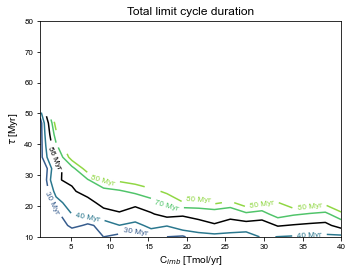

In [14]:
fig = plt.figure(figsize=(4.18, 3))
ax = fig.add_axes([0, 0, 1, 1])

vmin, vmax = np.nanmin(dur_grid), np.nanmax(dur_grid)
cs = ax.contour(Cimb_arr, tau_arr, dur_grid,
                levels=[30, 40, 70, 80], cmap="viridis",
                vmin=vmin, vmax=vmax, linewidths=1.5)
ax.clabel(cs, inline=True, fontsize=8, fmt='%0.0f Myr')

cs = ax.contour(Cimb_arr, tau_arr, dur_grid,
                levels=[56], colors="k", vmin=vmin, vmax=vmax, linewidths=1.5)
ax.clabel(cs, inline=True, fontsize=8, fmt='%0.0f Myr')

ax.set_title("Total limit cycle duration")
ax.set_xlabel("C$_{imb}$ [Tmol/yr]")
ax.set_ylabel("$\\tau$ [Myr]")

figname = "total_dur.pdf"
savefig(fig, figname, savefmt='pdf', supp_folder="supp")
plt.show()